In [1]:
# Common imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
import os
import urllib
import shutil

def download_file(url, dir_path="data"):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        
    file_name = os.path.split(url)[-1]
    file_path = os.path.join(dir_path, file_name)
    
    with urllib.request.urlopen(url) as response, open(file_path, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
        
    return file_path

In [3]:
# download_file("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv")
adv_df = pd.read_csv('data/Advertising.csv', usecols=[1, 2, 3, 4])
adv_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = adv_df[["TV", "radio", "newspaper"]].as_matrix()
y = adv_df.sales

/home/pavel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


## Dimensionality reduction

Трансформирует $p$ фич в $M$ линейных комбинаций этих фич, так, что $M < p$. Новые фичи ($Z_i$) используются для построения модели. Основная идея при трансформации - объяснить новыми фичами как можно больший процент вариативности (variance) исходных данных, при этом уменьшив размерность пространства.

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=X.shape[1]).fit(X)
for i in range(1, X.shape[1] + 1):
    print("n-components=%s, explained variance %.3f" % (i, sum(pca.explained_variance_ratio_[:i])))

n-components=1, explained variance 0.914
n-components=2, explained variance 0.978
n-components=3, explained variance 1.000


In [12]:
pca = PCA(n_components=2).fit(X)

In [13]:
pca.components_

array([[ 0.99982947,  0.01001377,  0.01551648],
       [-0.01807077,  0.35736234,  0.93379098]])

In [14]:
new_adv_df = pd.DataFrame(PCA(n_components=1).fit_transform(X), columns=["f1"])
new_adv_df["Sales"] = adv_df.sales
new_adv_df.head(5)

,f1,Sales
0,83.788546,22.1
1,-102.138730,10.4
2,-128.992484,9.3
3,5.070972,18.5
4,34.059003,12.9


In [15]:
pca_lm = smf.ols('Sales ~ f1', new_adv_df).fit()
rss = np.sum(pca_lm.resid ** 2)
print("RSS:", rss)
print("R^2:", pca_lm.rsquared)

RSS: 2088.6304922990535
R^2: 0.6144409930964045


### PCA

Text(0,0.5,'feature 2')

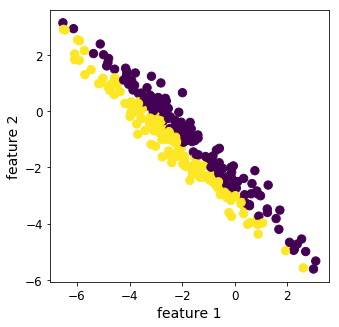

In [16]:
plt.rcParams['figure.figsize'] = 5, 5

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)
y = X_[:, 0] > 0
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y, s=70) # , linewidths=0
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

Text(0,0.5,'second principal component')

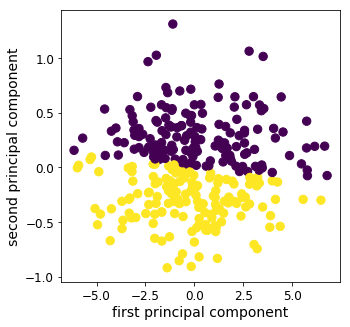

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=70) # linewidths=1, 
plt.xlabel("first principal component")
plt.ylabel("second principal component")

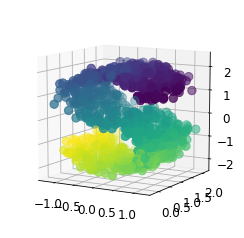

In [19]:

plt.rcParams['figure.figsize'] = 4, 4

from sklearn.datasets import make_s_curve
X, y = make_s_curve(n_samples=1000, noise=0.1)

from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=70)
ax.view_init(10, -60)

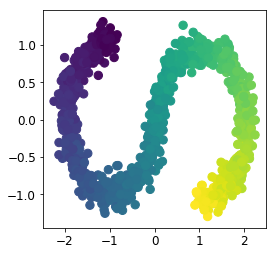

In [20]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=70)

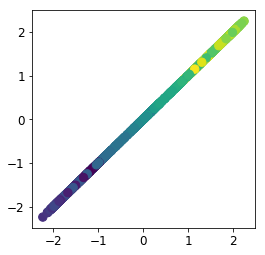

In [21]:
X_pca = PCA(n_components=1).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 0], c=y, s=70)

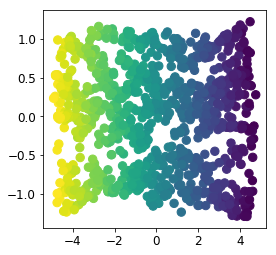

In [22]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, s=70)

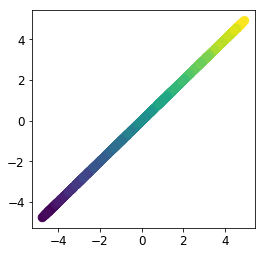

In [23]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=1)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 0], c=y, s=70)